In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import time
from datetime import datetime

In [2]:
disney_full = pd.read_csv('DIS.csv')

In [3]:
disney_full.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,1985-01-02,1.233125,1.238263,1.233125,1.235694,0.873995,1707856
1,1985-01-03,1.233125,1.233125,1.222849,1.225418,0.866726,11901470
2,1985-01-04,1.222849,1.222849,1.217711,1.220280,0.863092,3323264
3,1985-01-07,1.225418,1.243401,1.225418,1.235694,0.873995,3381652
4,1985-01-08,1.235694,1.245970,1.230556,1.243401,0.879445,2997263


In [4]:
disney = disney_full[['Date', 'Close']]
disney.Date = pd.to_datetime(disney.Date)
disney['Year'] = pd.DatetimeIndex(disney['Date']).year
disney.head()

c:\users\asus\appdata\local\programs\python\python39\lib\site-packages\pandas\core\frame.py:3607: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._set_item(key, value)


,Date,Close,Year
0,1985-01-02,1.235694,1985
1,1985-01-03,1.225418,1985
2,1985-01-04,1.220280,1985
3,1985-01-07,1.235694,1985
4,1985-01-08,1.243401,1985


## Ежедневные данные

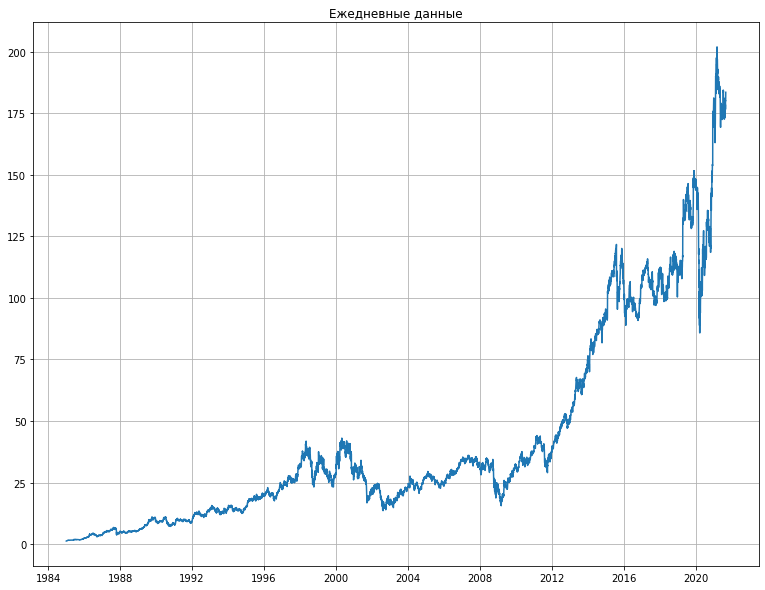

In [5]:
plt.figure(figsize=(13, 10))
plt.plot(disney.Date, disney.Close)
plt.title('Ежедневные данные')
plt.grid();

In [6]:
#disney['Year'] = pd.DatetimeIndex(disney['Date']).year
disney_by_year = disney.groupby('Year', as_index=False).agg({'Close': 'mean'})
#disney_by_year.Year = pd.to_datetime(disney_by_year.Year, format="%Y")
disney_by_year.head()

,Year,Close
0,1985,1.752167
1,1986,3.438423
2,1987,5.251870
3,1988,5.055528
4,1989,8.218060


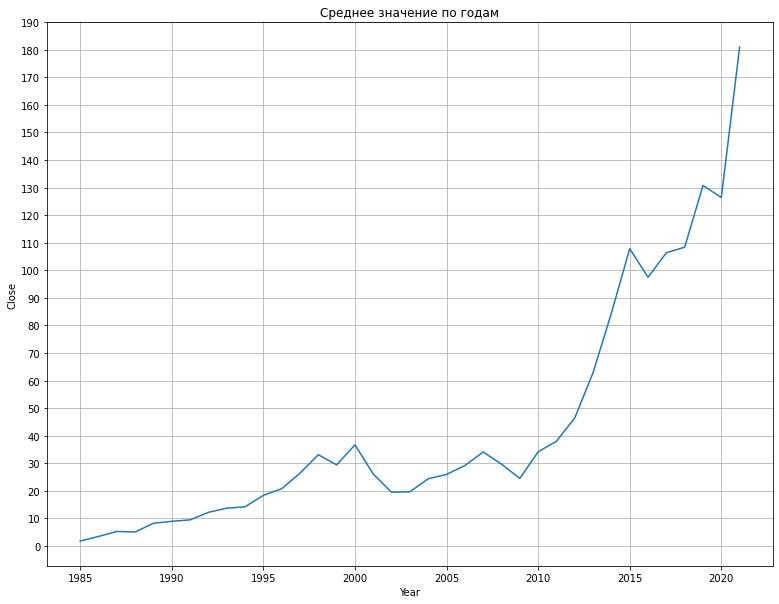

In [7]:
plt.figure(figsize=(13, 10))
sns.lineplot(x=disney_by_year.Year, y=disney_by_year.Close)
plt.grid()
plt.title('Среднее значение по годам')
plt.yticks(np.arange(0, max(disney_by_year.Close) + 10, 10));

## Полулогарифмический график

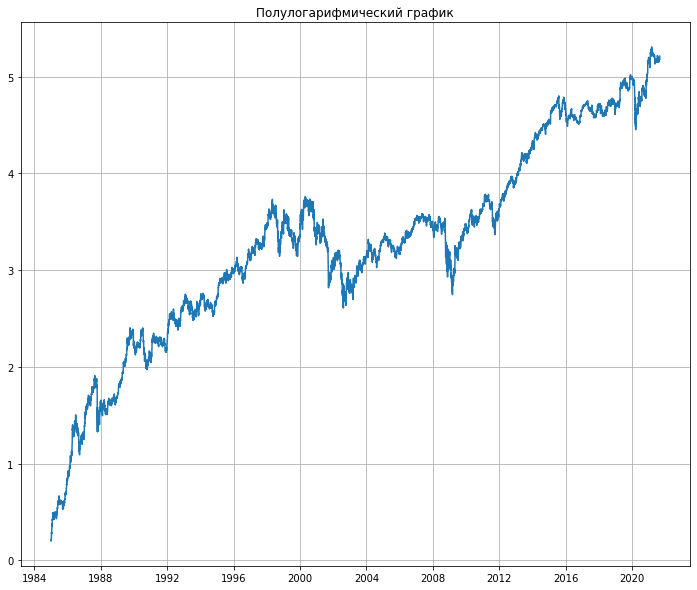

In [8]:
plt.figure(figsize=(12, 10))
plt.semilogy(disney.Date, disney.Close, base=np.exp(1))
plt.title('Полулогарифмический график')
plt.grid()

labels = np.arange(6)
points = np.exp(labels)
plt.yticks(points, labels);

## График 1/y

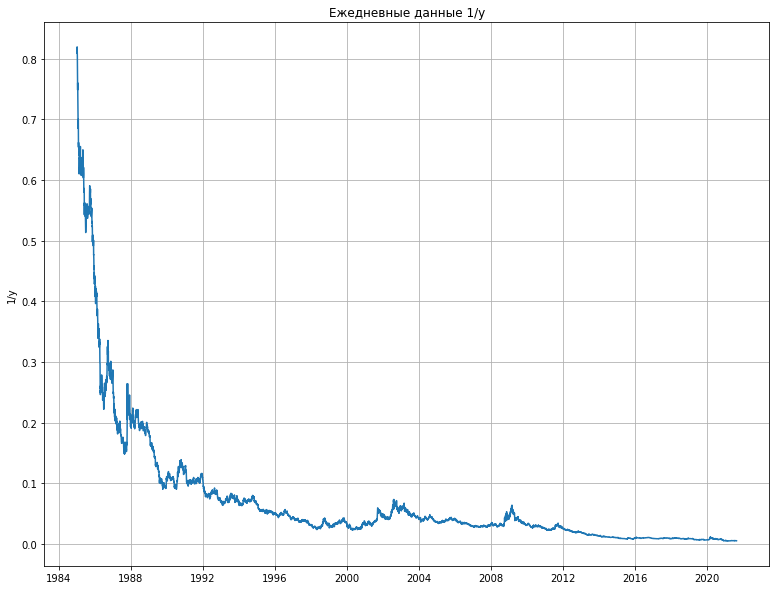

In [9]:
plt.figure(figsize=(13, 10))
plt.plot(disney.Date, 1 / disney.Close)
plt.title('Ежедневные данные 1/y')
plt.ylabel('1/y')
plt.grid();

## Участки завершения интенсивного роста (1/y)

In [10]:
def revers_segment(x1, x2, y2, y1=0): # x в формате '2020-01-01'
    plt.figure(figsize=(13, 10))
    plt.plot(disney.Date, 1 / disney.Close)
    plt.title('Ежедневные данные 1/y')
    plt.grid()
    lim = (datetime.strptime(x1, "%Y-%m-%d"), 
           datetime.strptime(x2, "%Y-%m-%d"))
    plt.xlim(lim)
    plt.ylim(y1, y2);

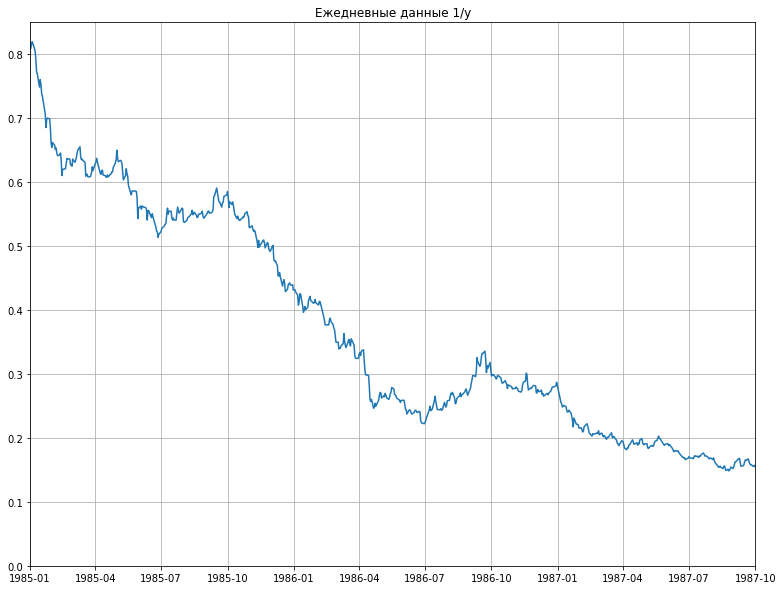

In [11]:
revers_segment(x1='1985-01-01', x2='1987-10-01', y2=0.85)

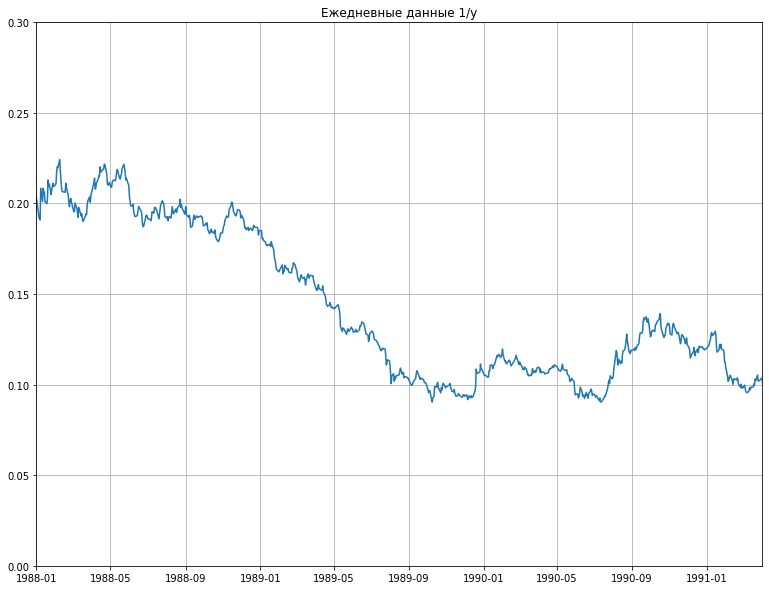

In [12]:
revers_segment(x1='1988-01-01', x2='1991-04-01', y2=0.3)

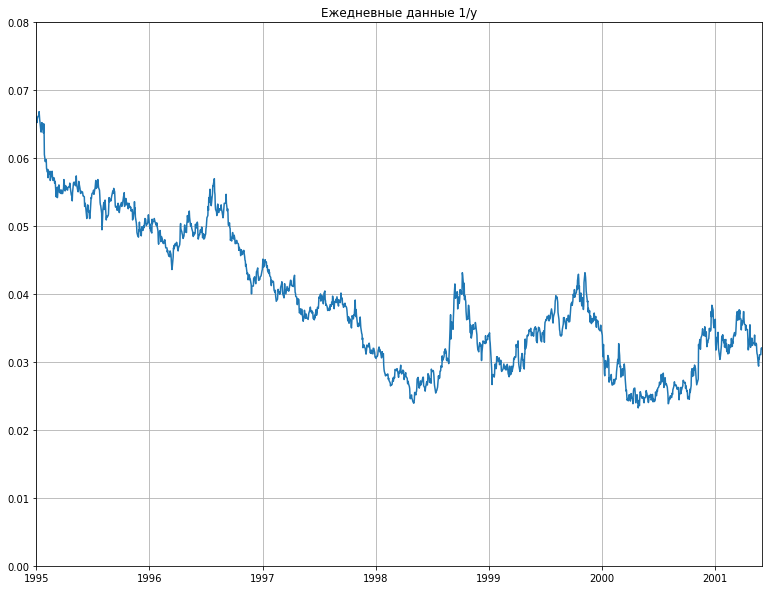

In [13]:
revers_segment(x1='1995-01-01', x2='2001-06-01', y2=0.08)

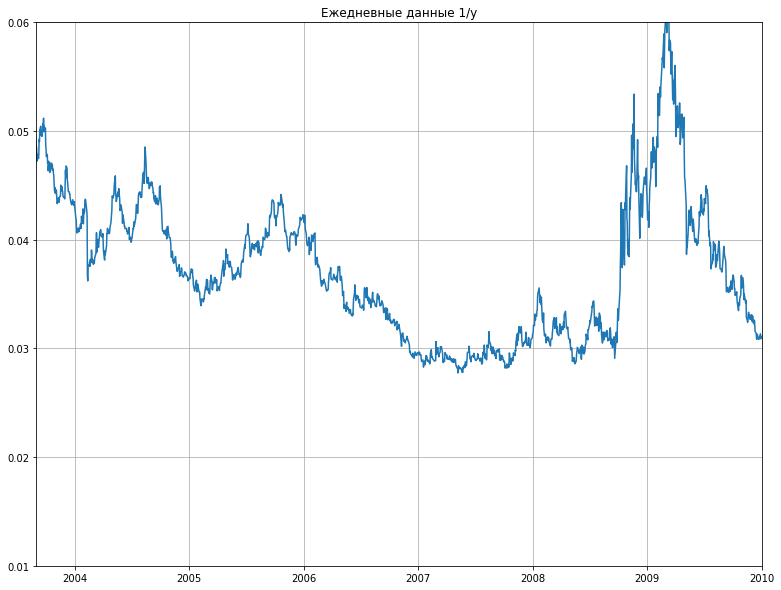

In [14]:
revers_segment(x1='2003-09-01', x2='2010-01-01', y1=0.01, y2=0.06)

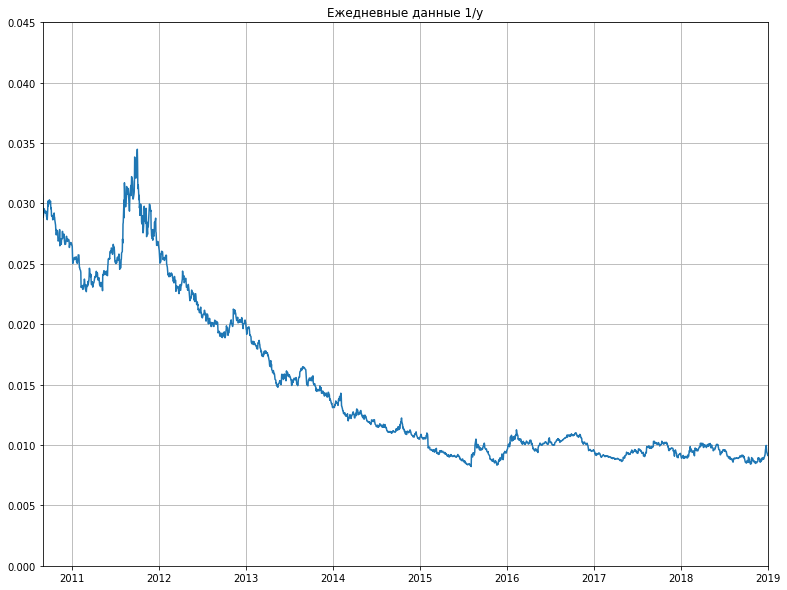

In [15]:
revers_segment(x1='2010-09-01', x2='2019-01-01', y2=0.045)

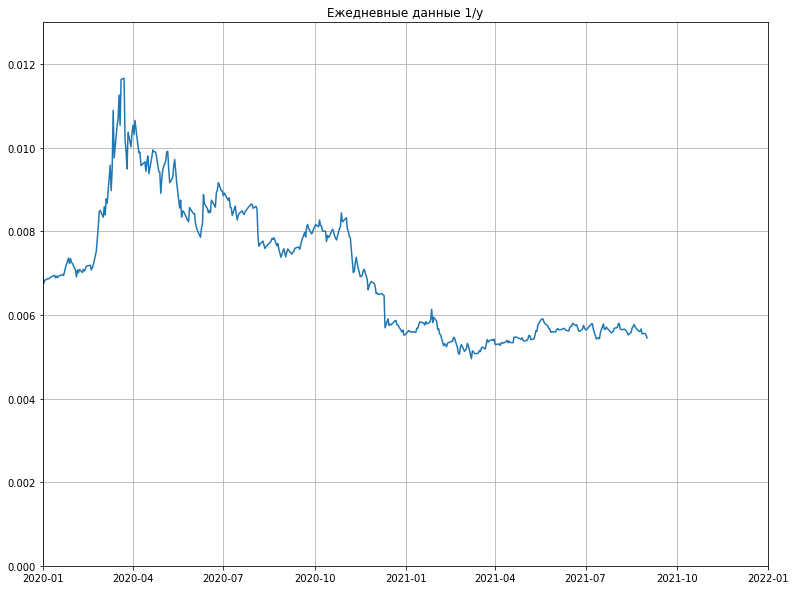

In [16]:
revers_segment(x1='2020-01-01', x2='2022-01-01', y2=0.013)

## Поиск конца интенсивного роста на участках

In [17]:
disney['t'] = np.arange(1, disney.shape[0] + 1);

c:\users\asus\appdata\local\programs\python\python39\lib\site-packages\pandas\core\frame.py:3607: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._set_item(key, value)


In [18]:
def segment_semilog(t0, t1, y2, y1=0): # t0 и t1 в формате '2020-01-01'
    y0 = disney.query('Date == @t0').Close.values
    print('y0 = ', y0)

    t0 = disney.query('Date == @t0').t.values
    print('t0 = ', t0)
    t1 = disney.query('Date == @t1').t.values
    
    plt.figure(figsize=(12, 10))
    plt.plot((disney.t - t0) ** 2, np.log(disney.Close / y0))
    plt.grid()
    plt.ylabel('ln(y / y0)')
    plt.xlabel('(t - t0)^2')
    plt.xlim(0, (t1 - t0)** 2 + 10000 * y0)
    plt.vlines((t1 - t0)** 2, -1, 5, color = 'r', linestyle='--')
    plt.ylim(y1, y2);

y0 =  [1.813721]
t0 =  [170]


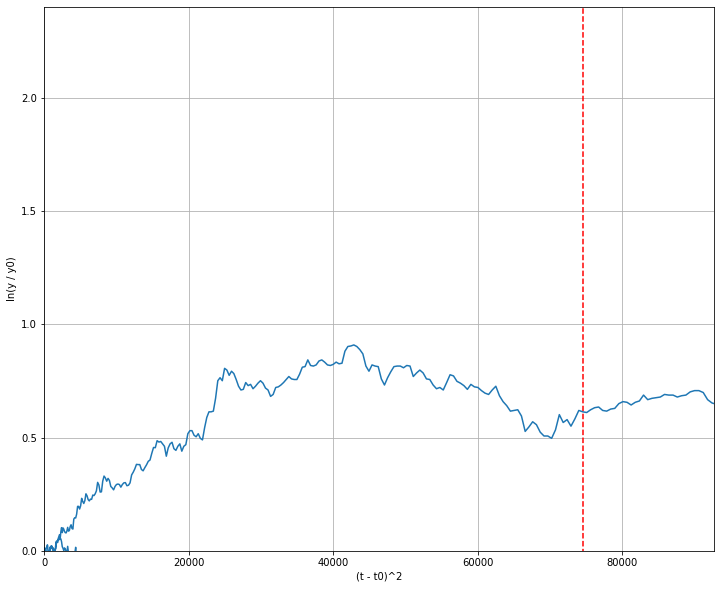

In [19]:
segment_semilog(t0='1985-09-03', t1='1986-10-02', y2=2.4)

1986: ln(y/y0) = 1.5

y0 =  [5.384646]
t0 =  [970]


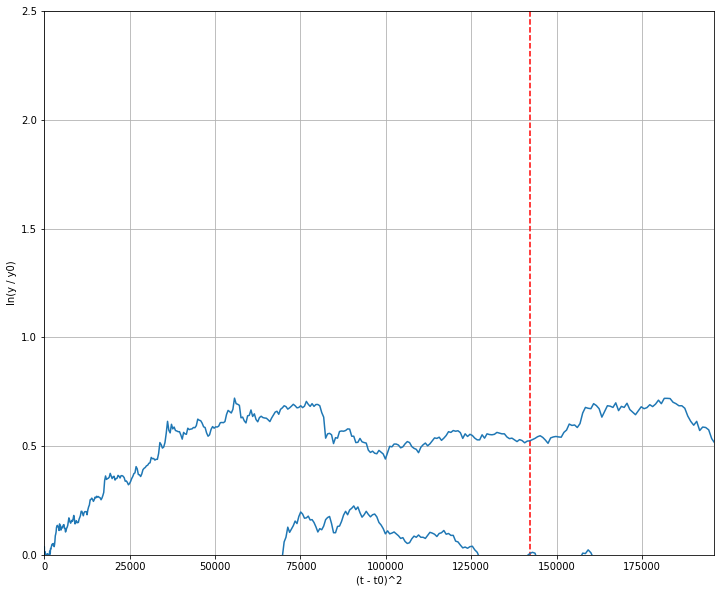

In [20]:
segment_semilog(t0='1988-11-01', t1='1990-05-01', y2=2.5)

1990: ln(y/y0) = 1.65

y0 =  [40.]
t0 =  [6833]


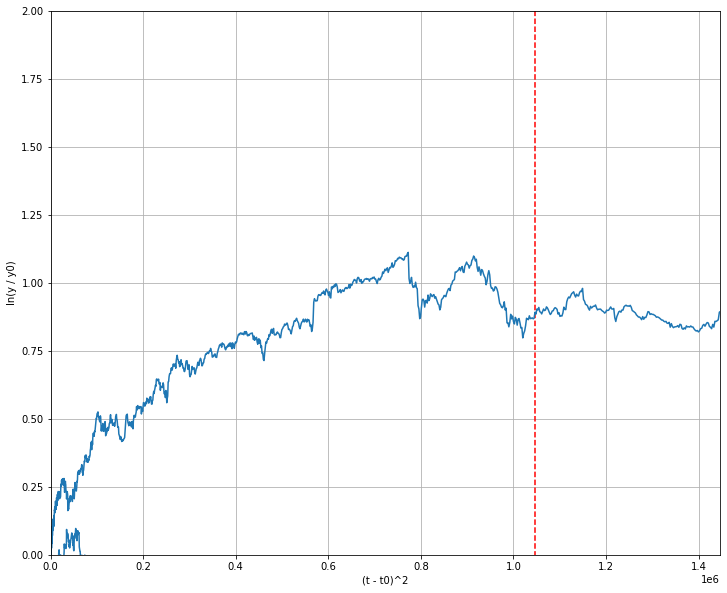

In [21]:
segment_semilog(t0='2012-02-03', t1='2016-03-01', y2=2)

2016: ln(y/y0) = 1.30

## Графики с накопительной суммой y*

In [33]:
def segment_log_ycs_y(t1, t2, y2, y1=0): # t0 и t1 в формате '2020-01-01'
    lim = (datetime.strptime(t1, "%Y-%m-%d"), 
           datetime.strptime(t2, "%Y-%m-%d"))
    
    plt.figure(figsize=(12, 10))
    plt.plot(disney.Date, np.log(y_cumsum / disney.Close))
    plt.grid()
    plt.ylabel('ln(y*/y)')
    plt.xlabel('Date')
    plt.xlim(lim)
    plt.ylim(y1, y2);

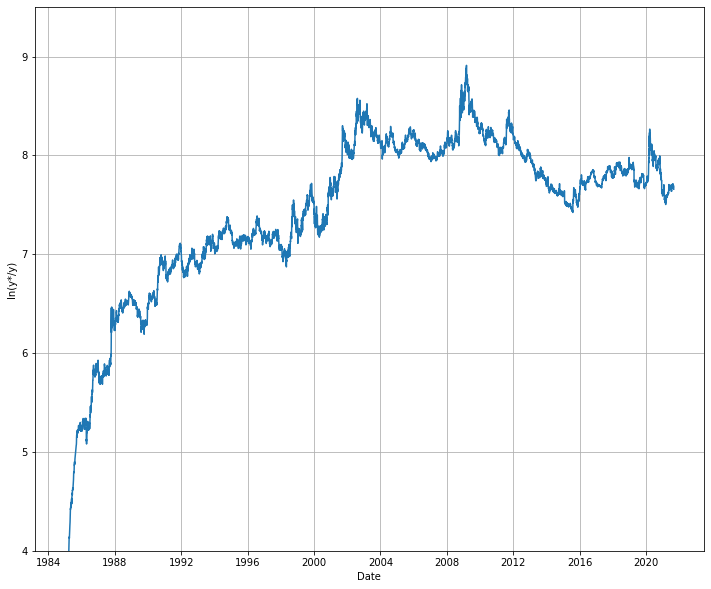

In [55]:
# по всем данным
plt.figure(figsize=(12, 10))
plt.plot(disney.Date, np.log(y_cumsum / disney.Close))
plt.grid()
plt.ylabel('ln(y*/y)')
plt.xlabel('Date')
plt.ylim(4, 9.5);

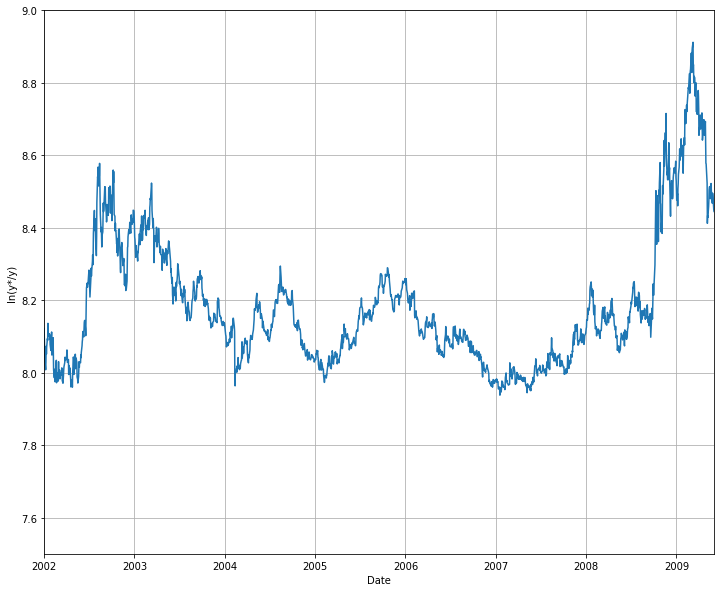

In [61]:
segment_log_ycs_y(t1='2002-01-01', t2='2009-06-01', y1=7.5, y2=9)

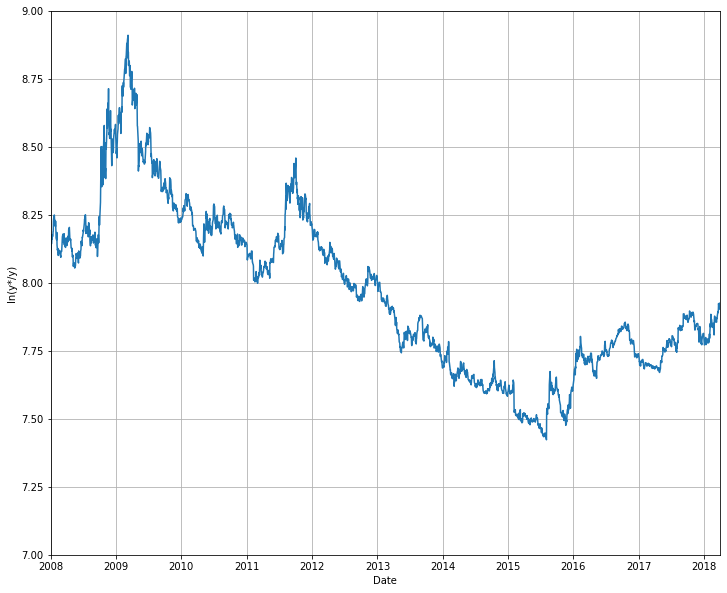

In [47]:
segment_log_ycs_y(t1='2008-01-01', t2='2018-04-01', y1=7, y2=9)

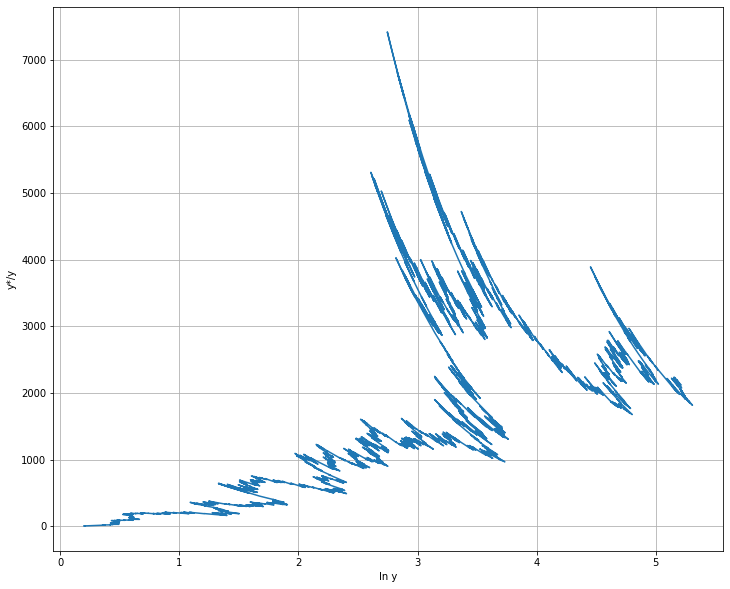

In [30]:
plt.figure(figsize=(12, 10))
plt.plot(np.log(disney.Close), y_cumsum / disney.Close)
plt.grid()
plt.ylabel('y*/y')
plt.xlabel('ln y');